### Machete Clasificación Iniciación


### Dataset Titanic

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en:

1. Generar dos casos benchmark para este dataset.\
1. Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente. No te olvides de agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. 
1. Evaluar precisión, exhaustividad y F-Score para los modelos con los mejores hiperparámetros. Existen varias funciones de Scikit-Learn que puedes usar. Puedes consultar la información [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Es importante que leas **detalladamente** la documentación de la función que elijas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , confusion_matrix


In [20]:
# Importamos el Dataset
df = pd.read_csv("DS_Bitácora_12_Titanic.csv")
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0


TODO: eleccion en una sola parte de la variable respusta

In [21]:
X = df.drop("Survived", axis=1)
y = df.Survived

1. **Casos Benchmark (Comparación)**

Predecimos que todos sobreviven

In [22]:
y_pred = np.ones(y.size)

In [23]:
accuracy_score(y, y_pred)

0.4061624649859944

In [26]:
confusion_matrix(y, y_pred)

array([[  0, 424],
       [  0, 290]], dtype=int64)

Y que nadie sobrevive

In [27]:
y_pred = np.zeros(y.size)

In [28]:
accuracy_score(y, y_pred)

0.5938375350140056

In [29]:
confusion_matrix(y, y_pred)

array([[424,   0],
       [290,   0]], dtype=int64)

2. **Separación - Entrenamiento del Modelo y evaluación**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

3. **Elección de Modelos**


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf_tree = DecisionTreeClassifier()
clf_knn = KNeighborsClassifier()

4. **Optimización de Párametros**

4.1 **Optimización para vecinos más cercanos**

In [33]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

TODO : Proponer una forma automatica de eleccion de hiperparametro

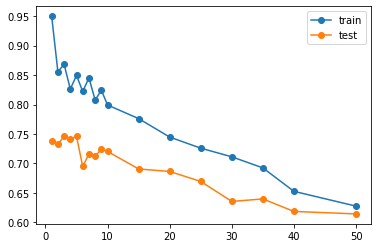

In [34]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

**Optimización para árboles**

In [38]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

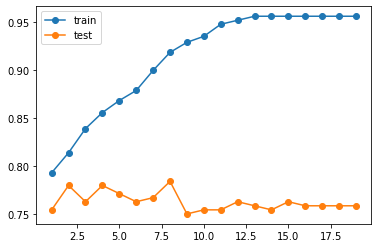

In [39]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()

5. **Evaluación del modelo**

**Precisión, Exhaustividad y F-Score**

In [40]:
clf_tree_best = DecisionTreeClassifier(max_depth = 8)
clf_knn_best = KNeighborsClassifier(n_neighbors=5)

clf_tree_best.fit(X_train, y_train)
clf_knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
from sklearn.metrics import precision_recall_fscore_support

**Para el modelo árbol**

In [42]:
y_test_pred = clf_tree_best.predict(X_test)

precision_recall_fscore_support(y_test, y_test_pred, pos_label= 1)

(array([0.78807947, 0.78823529]),
 array([0.86861314, 0.67676768]),
 array([0.82638889, 0.72826087]),
 array([137,  99], dtype=int64))

**Para el modelo de vecinos**

In [43]:
y_test_pred = clf_knn_best.predict(X_test)

precision_recall_fscore_support(y_test, y_test_pred, pos_label= 1)

(array([0.74213836, 0.75324675]),
 array([0.86131387, 0.58585859]),
 array([0.7972973 , 0.65909091]),
 array([137,  99], dtype=int64))